**DỰ BÁO DOANH NGHIỆP NGÀNH BÁN LẺ TẠI VIỆT NAM MẤT KHẢ NĂNG TRẢ NỢ**

Trong bối cảnh nền kinh tế Việt Nam đang dần phục hồi sau đại dịch và chịu nhiều biến động từ thị trường quốc tế, ngành bán lẻ đã nổi lên như một lĩnh vực tăng trưởng nhanh, đóng góp đáng kể vào GDP quốc gia và tạo thêm nhiều việc làm cho xã hội. Tuy nhiên, song song với sự phát triển nhanh chóng, nhiều doanh nghiệp bán lẻ đang phải đối mặt với áp lực chi phí tăng cao, khó khăn trong quản lý dòng tiền và rủi ro mất khả năng trả nợ — đặc biệt là các doanh nghiệp vừa và nhỏ. Trong những năm gần đây, không ít công ty bán lẻ tại Việt Nam đã rơi vào tình trạng vỡ nợ do thua lỗ kéo dài, dòng tiền kinh doanh âm và quản trị tài chính yếu kém. Dù vậy, việc dự báo nguy cơ tài chính và mất khả năng thanh toán trong ngành bán lẻ vẫn chưa nhận được sự quan tâm đúng mức, nhất là thông qua ứng dụng các kỹ thuật Machine Learning vào phân tích dữ liệu tài chính.

Vì vậy, em nghiên cứu đã lựa chọn đề tài “Dự báo mất khả năng trả nợ của doanh nghiệp ngành bán lẻ tại Việt Nam bằng Machine Learning” với mục tiêu xây dựng các mô hình dự báo rủi ro vỡ nợ dựa trên các chỉ số tài chính doanh nghiệp. Đồng thời, nghiên cứu cũng hướng đến việc phân tích các yếu tố tài chính ảnh hưởng đến khả năng trả nợ của doanh nghiệp và cung cấp cảnh báo sớm cho nhà đầu tư, ngân hàng và các tổ chức tín dụng trong quá trình ra quyết định. Đề tài không chỉ giúp sinh viên ứng dụng kiến thức Machine Learning vào bài toán thực tiễn mà còn góp phần thúc đẩy vai trò của phân tích dữ liệu trong quản trị rủi ro tài chính — một lĩnh vực ngày càng được quan tâm trên thế giới và tại Việt Nam.



**1. Tiền xử lý dữ liệu**

In [ ]:
# IMPORT:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


In [ ]:
# Đọc file CSV
file_path = '/content/MachineLearningdata.csv'
df = pd.read_csv(file_path)

# Xem sơ bộ dữ liệu
print(df.shape)
df.head()


(320, 13)


,Company,Date,Total Assets,Total Liabilities,Common Equity - Total,Total Current Assets,Total Current Liabilities,Inventories - Total,Net Cash Flow from Operating Activities,Net Income after Tax,Income Available to Common Shares,Gross Profit Margin - %,Revenue from Business Activities - Total
0,GPC.HNO,3/31/2022,NaN,NaN,NaN,NaN,NaN,NaN,-5.341732e+10,1.279061e+09,7.080003e+08,5.54682,1.338170e+11
1,GPC.HNO,6/30/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GPC.HNO,9/30/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.287940e+09,7.526232e+08,1.85396,1.914140e+11
3,GPC.HNO,12/31/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GPC.HNO,3/31/2023,6.343950e+11,3.332248e+10,5.841490e+11,2.899010e+11,2.049745e+10,1.329564e+10,-1.371317e+10,2.153114e+09,1.846839e+09,8.13807,4.806087e+10


In [ ]:
# Kiểm tra số lượng missing từng cột
print(df.isnull().sum())

df['missing_count'] = df.isnull().sum(axis=1)

# Lọc và hiển thị những dòng có missing value (missing_count > 0)
print(df.loc[df['missing_count'] > 0, 'missing_count'])


Company                                     0
Date                                        0
Total Assets                                5
Total Liabilities                           5
Common Equity - Total                       4
Total Current Assets                        5
Total Current Liabilities                   5
Inventories - Total                         7
Net Cash Flow from Operating Activities     4
Net Income after Tax                        2
Income Available to Common Shares           2
Gross Profit Margin - %                     3
Revenue from Business Activities - Total    2
dtype: int64
0      6
1     11
2      7
3     11
6      1
64     5
67     1
68     2
Name: missing_count, dtype: int64


In [ ]:
# Xóa các dòng có từ 5 giá trị null
df = df.loc[df['missing_count'] <= 4].copy()

# Xóa cột 'missing_count'
df.drop(columns='missing_count', inplace=True)

# Lấy các cột số
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Điền missing value bằng mean của từng công ty
for col in numeric_cols:
    df[col] = df.groupby('Company')[col].transform(lambda x: x.fillna(x.mean()))

# Kiểm tra lại missing value
print(df.isnull().sum())
df = df.reset_index(drop=True)
print(df.shape)
df.head()


Company                                     0
Date                                        0
Total Assets                                0
Total Liabilities                           0
Common Equity - Total                       0
Total Current Assets                        0
Total Current Liabilities                   0
Inventories - Total                         0
Net Cash Flow from Operating Activities     0
Net Income after Tax                        0
Income Available to Common Shares           0
Gross Profit Margin - %                     0
Revenue from Business Activities - Total    0
dtype: int64
(315, 13)


,Company,Date,Total Assets,Total Liabilities,Common Equity - Total,Total Current Assets,Total Current Liabilities,Inventories - Total,Net Cash Flow from Operating Activities,Net Income after Tax,Income Available to Common Shares,Gross Profit Margin - %,Revenue from Business Activities - Total
0,GPC.HNO,3/31/2023,6.343950e+11,3.332248e+10,5.841490e+11,2.899010e+11,2.049745e+10,1.329564e+10,-1.371317e+10,2.153114e+09,1.846839e+09,8.13807,4.806087e+10
1,GPC.HNO,6/30/2023,6.402390e+11,3.893757e+10,5.842310e+11,2.958620e+11,2.541208e+10,2.612249e+10,-1.105170e+10,2.287562e+08,8.161913e+07,41.94735,1.883303e+09
2,GPC.HNO,9/30/2023,6.308290e+11,3.277775e+10,5.808140e+11,2.879630e+11,2.100023e+10,2.485569e+10,-1.923763e+10,-3.250025e+09,-3.417113e+09,12.93728,6.186964e+09
3,GPC.HNO,12/31/2023,6.368770e+11,4.558947e+10,5.805650e+11,2.961440e+11,3.528670e+10,1.889782e+10,-8.418999e+09,-1.380410e+07,-9.805142e+07,15.72501,3.333240e+10
4,GPC.HNO,3/31/2024,6.433350e+11,4.877053e+10,5.837190e+11,2.999870e+11,3.899477e+10,2.255398e+10,-9.990218e+09,1.206514e+09,1.081825e+09,20.45330,1.078082e+10


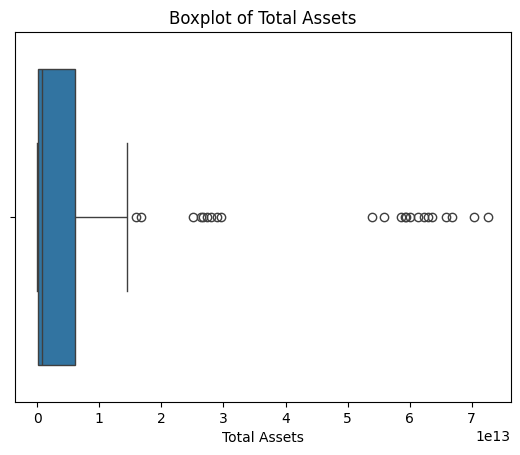

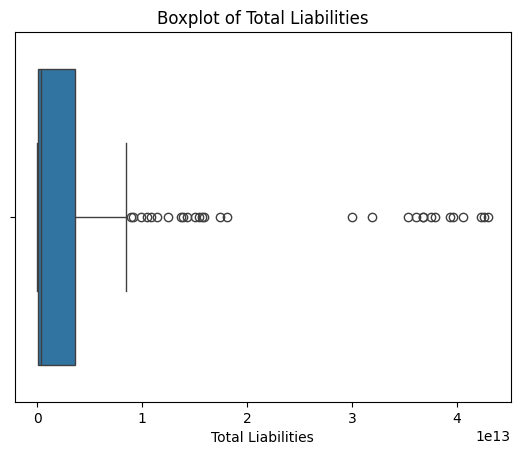

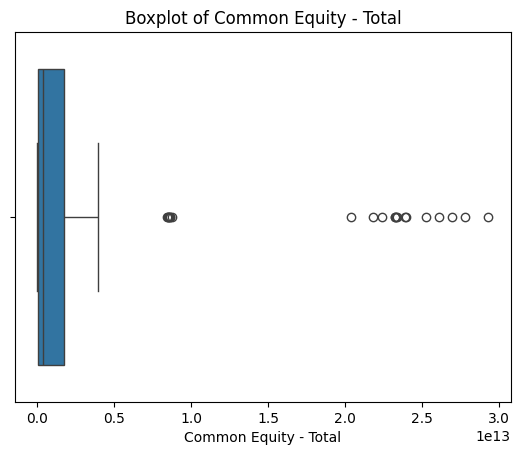

In [ ]:

for col in ['Total Assets', 'Total Liabilities', 'Common Equity - Total']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Lấy các cột số
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Tính Q1, Q3 và IQR cho các cột số
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Loại outliers dựa trên IQR
df_no_outlier = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) |
                     (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df.reset_index(drop=True)


**2.  Trích xuất và tính toán các chỉ số tài chính**



In [ ]:
# Tạo bản sao để tránh Warning
df_no_outlier = df_no_outlier.copy()

# Tính các chỉ số tài chính
df_no_outlier['Debt_Equity'] = df_no_outlier['Total Liabilities'] / df_no_outlier['Common Equity - Total']
df_no_outlier['Current_Ratio'] = df_no_outlier['Total Current Assets'] / df_no_outlier['Total Current Liabilities']
df_no_outlier['Quick_Ratio'] = (df_no_outlier['Total Current Assets'] - df_no_outlier['Inventories - Total']) / df_no_outlier['Total Current Liabilities']
df_no_outlier['Net_Profit_Margin'] = df_no_outlier['Net Income after Tax'] / df_no_outlier['Revenue from Business Activities - Total']
df_no_outlier['ROA'] = df_no_outlier['Net Income after Tax'] / df_no_outlier['Total Assets']
df_no_outlier['ROE'] = df_no_outlier['Net Income after Tax'] / df_no_outlier['Common Equity - Total']
df_no_outlier['Inventory_Turnover'] = df_no_outlier['Revenue from Business Activities - Total'] / df_no_outlier['Inventories - Total']

# Tính Revenue Growth theo từng doanh nghiệp
df_no_outlier = df_no_outlier.sort_values(['Company', 'Date']).reset_index(drop=True)
df_no_outlier['Revenue_Growth'] = df_no_outlier.groupby('Company')['Revenue from Business Activities - Total'].pct_change()

# Nếu dòng đầu của từng công ty bị NaN, thay bằng trung bình Revenue Growth của chính công ty đó
df_no_outlier['Revenue_Growth'] = df_no_outlier.groupby('Company')['Revenue_Growth'].transform(
    lambda x: x.fillna(x.mean())
)

# Kiểm tra lại
df_no_outlier.head()



,Company,Date,Total Assets,Total Liabilities,Common Equity - Total,Total Current Assets,Total Current Liabilities,Inventories - Total,Net Cash Flow from Operating Activities,Net Income after Tax,...,Gross Profit Margin - %,Revenue from Business Activities - Total,Debt_Equity,Current_Ratio,Quick_Ratio,Net_Profit_Margin,ROA,ROE,Inventory_Turnover,Revenue_Growth
0,AST.HM,12/31/2021,5.025340e+11,9.007543e+10,3.730060e+11,2.815520e+11,8.733541e+10,2.826187e+10,-1.072421e+10,-1.806471e+10,...,68.15255,2.793393e+10,0.241485,3.223801,2.900200,-0.646694,-0.035947,-0.048430,0.988396,0.813100
1,AST.HM,12/31/2022,5.788660e+11,1.233920e+11,3.946260e+11,3.500010e+11,1.155150e+11,5.358540e+10,4.856255e+10,2.534333e+10,...,54.64729,2.162340e+11,0.312681,3.029918,2.566036,0.117203,0.043781,0.064221,4.035316,6.740908
2,AST.HM,12/31/2023,7.612440e+11,1.735240e+11,5.053660e+11,5.202930e+11,1.713240e+11,1.005600e+11,5.741370e+10,4.002145e+10,...,58.80366,2.892430e+11,0.343363,3.036895,2.449937,0.138366,0.052574,0.079193,2.876323,0.337639
3,AST.HM,12/31/2024,8.532800e+11,2.349810e+11,5.263420e+11,6.058180e+11,2.344250e+11,8.655525e+10,1.026340e+11,5.964283e+10,...,61.62924,3.515020e+11,0.446442,2.584272,2.215049,0.169680,0.069898,0.113316,4.061013,0.215248
4,AST.HM,3/31/2022,4.893510e+11,9.694754e+10,3.518790e+11,2.676970e+11,8.745582e+10,2.623748e+10,-9.041689e+09,-2.369156e+10,...,46.04833,6.766855e+10,0.275514,3.060940,2.760931,-0.350112,-0.048414,-0.067329,2.579080,-0.807487


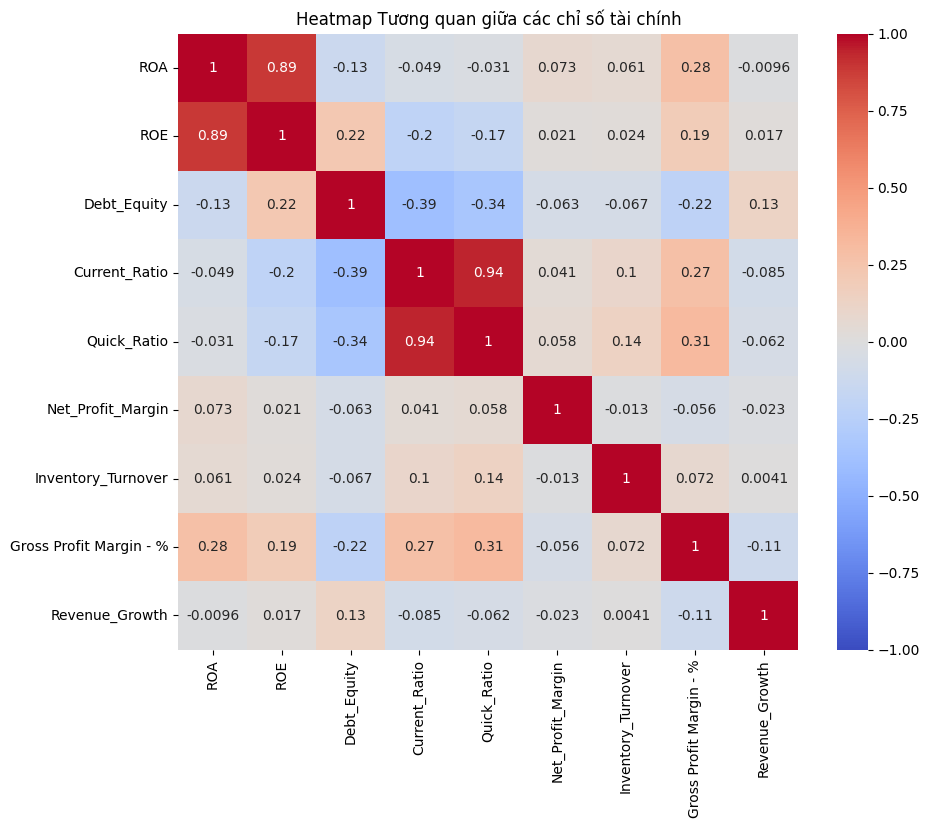

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
corr_matrix = df_no_outlier[['ROA', 'ROE', 'Debt_Equity', 'Current_Ratio', 'Quick_Ratio',
                             'Net_Profit_Margin', 'Inventory_Turnover','Gross Profit Margin - %', 'Revenue_Growth']].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Tương quan giữa các chỉ số tài chính")
plt.show()


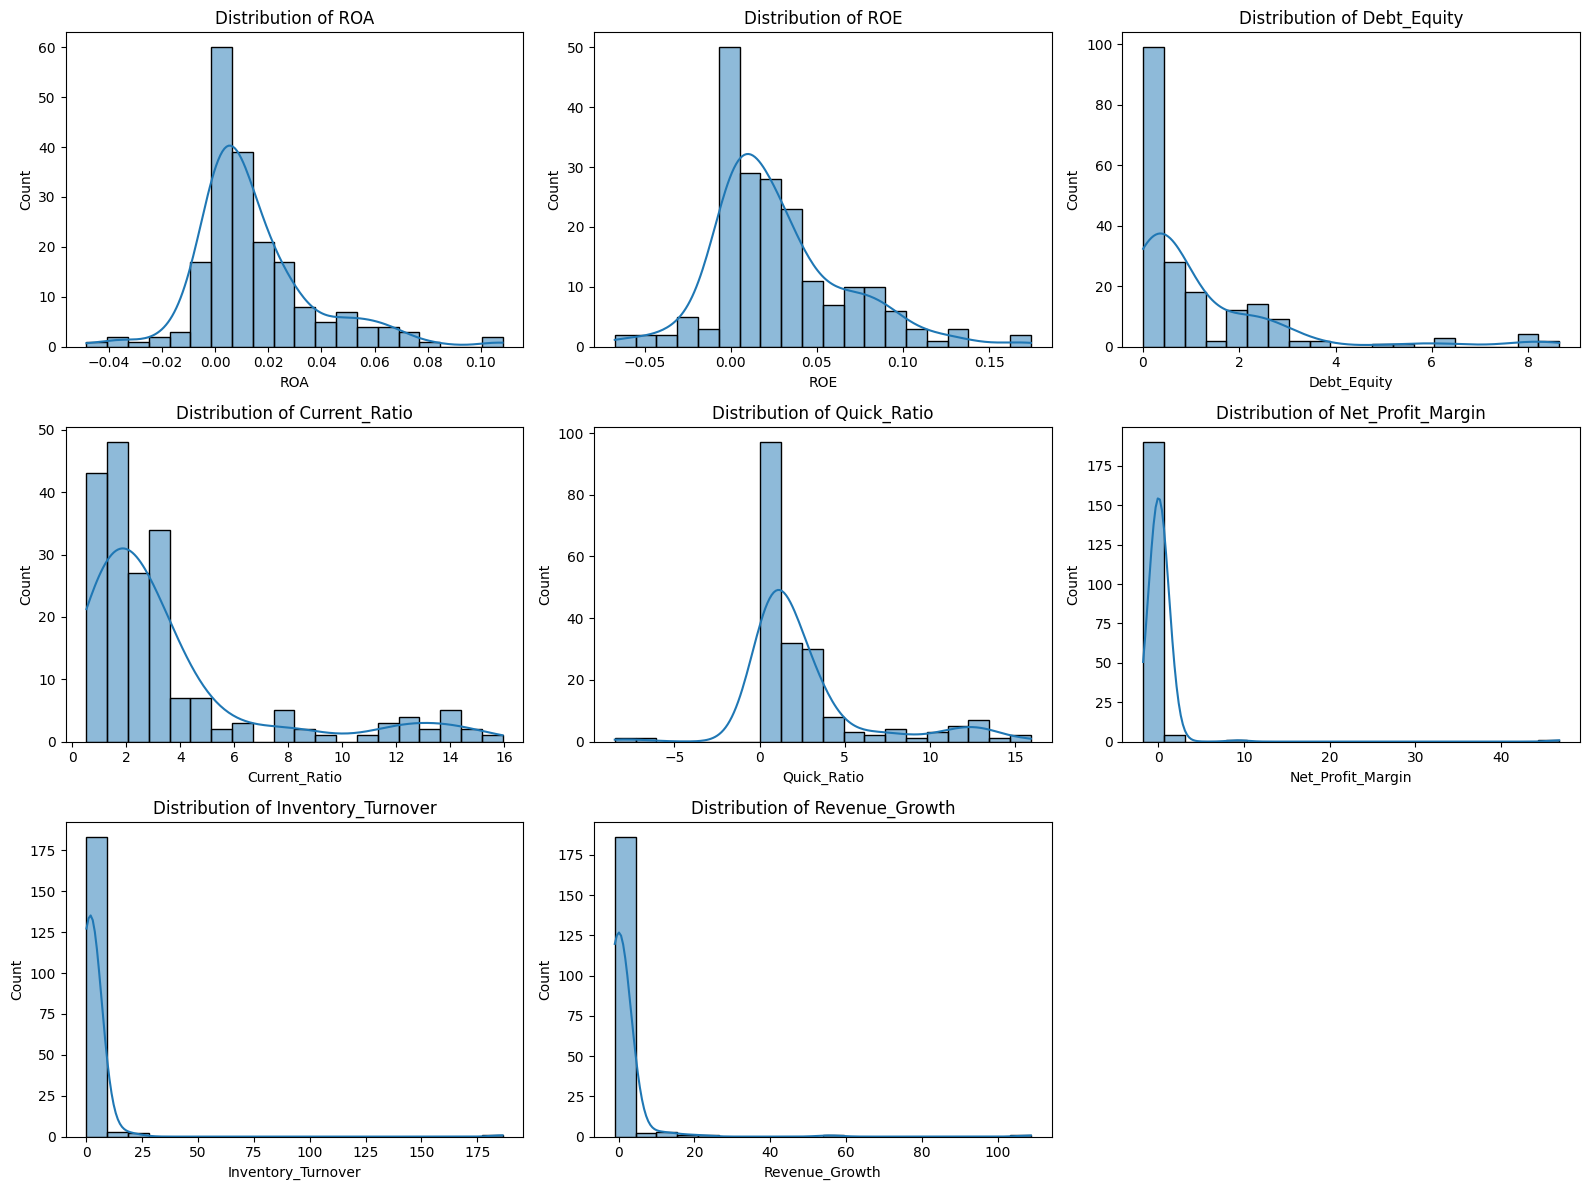

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

financial_metrics = ['ROA', 'ROE', 'Debt_Equity', 'Current_Ratio', 'Quick_Ratio',
                     'Net_Profit_Margin', 'Inventory_Turnover', 'Revenue_Growth']

plt.figure(figsize=(16, 12))
for i, col in enumerate(financial_metrics):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_no_outlier[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

In [ ]:
df_no_outlier.loc[:, 'Default_Label'] = (
    (df_no_outlier['Net Cash Flow from Operating Activities'] < 0) |
    (df_no_outlier['Common Equity - Total'] < 0)
).astype(int)
df_no_outlier.head()

,Company,Date,Total Assets,Total Liabilities,Common Equity - Total,Total Current Assets,Total Current Liabilities,Inventories - Total,Net Cash Flow from Operating Activities,Net Income after Tax,...,Revenue from Business Activities - Total,Debt_Equity,Current_Ratio,Quick_Ratio,Net_Profit_Margin,ROA,ROE,Inventory_Turnover,Revenue_Growth,Default_Label
0,AST.HM,12/31/2021,5.025340e+11,9.007543e+10,3.730060e+11,2.815520e+11,8.733541e+10,2.826187e+10,-1.072421e+10,-1.806471e+10,...,2.793393e+10,0.241485,3.223801,2.900200,-0.646694,-0.035947,-0.048430,0.988396,0.813100,1
1,AST.HM,12/31/2022,5.788660e+11,1.233920e+11,3.946260e+11,3.500010e+11,1.155150e+11,5.358540e+10,4.856255e+10,2.534333e+10,...,2.162340e+11,0.312681,3.029918,2.566036,0.117203,0.043781,0.064221,4.035316,6.740908,0
2,AST.HM,12/31/2023,7.612440e+11,1.735240e+11,5.053660e+11,5.202930e+11,1.713240e+11,1.005600e+11,5.741370e+10,4.002145e+10,...,2.892430e+11,0.343363,3.036895,2.449937,0.138366,0.052574,0.079193,2.876323,0.337639,0
3,AST.HM,12/31/2024,8.532800e+11,2.349810e+11,5.263420e+11,6.058180e+11,2.344250e+11,8.655525e+10,1.026340e+11,5.964283e+10,...,3.515020e+11,0.446442,2.584272,2.215049,0.169680,0.069898,0.113316,4.061013,0.215248,0
4,AST.HM,3/31/2022,4.893510e+11,9.694754e+10,3.518790e+11,2.676970e+11,8.745582e+10,2.623748e+10,-9.041689e+09,-2.369156e+10,...,6.766855e+10,0.275514,3.060940,2.760931,-0.350112,-0.048414,-0.067329,2.579080,-0.807487,1


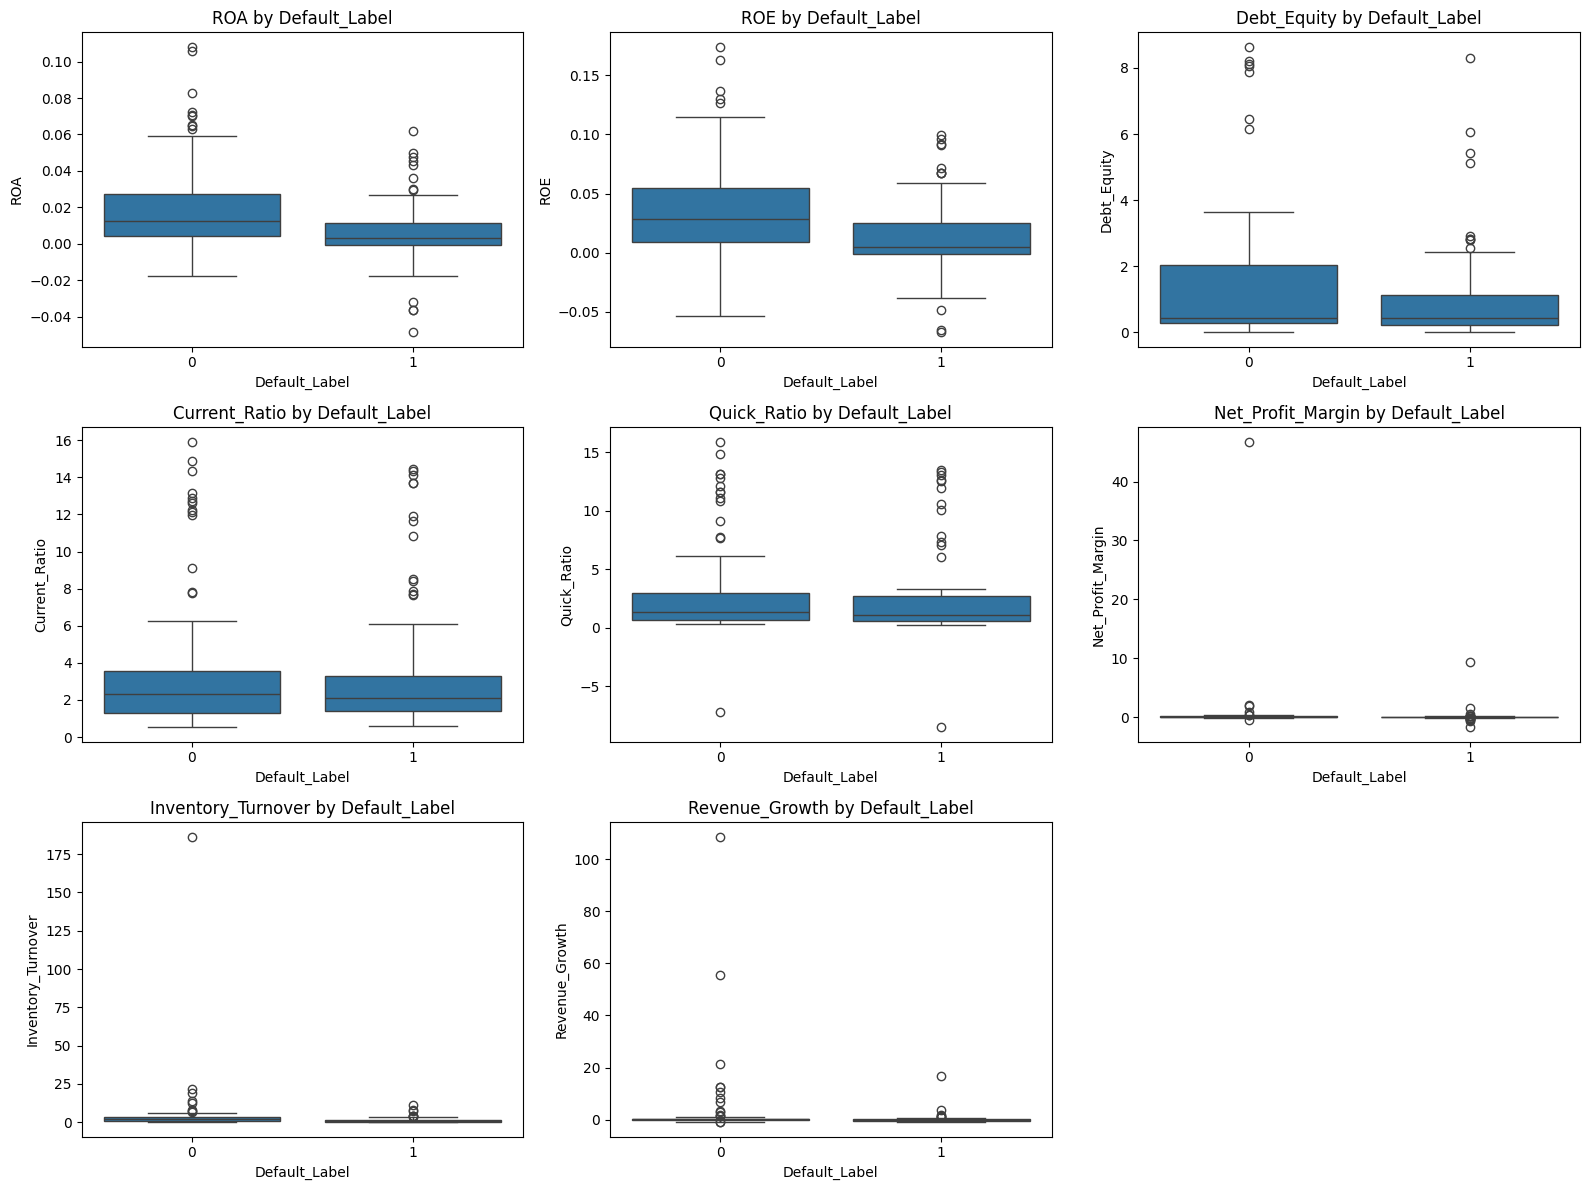

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(financial_metrics):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Default_Label', y=col, data=df_no_outlier)
    plt.title(f'{col} by Default_Label')
plt.tight_layout()
plt.show()


Trong nghiên cứu về dự báo khả năng trả nợ của các doanh nghiệp ngành bán lẻ tại Việt Nam, chúng tôi đã sử dụng các chỉ số tài chính quan trọng để phân tích sự khác biệt giữa các doanh nghiệp có khả năng trả nợ tốt (Default_Label = 0) và các doanh nghiệp gặp khó khăn về tài chính (Default_Label = 1). Các phân tích sử dụng biểu đồ boxplot cho thấy rõ ràng các dấu hiệu tài chính đặc trưng giúp phân biệt hai nhóm doanh nghiệp này.

Các chỉ số như ROA (Return on Assets) và ROE (Return on Equity) cho thấy rằng các doanh nghiệp không gặp vấn đề về khả năng trả nợ có mức lợi nhuận từ tài sản và vốn chủ sở hữu cao hơn nhiều so với các doanh nghiệp mất khả năng trả nợ. Điều này phản ánh khả năng sinh lợi cao từ các tài sản và vốn của những doanh nghiệp hoạt động hiệu quả.

Ngoài ra, tỷ lệ Debt/Equity (Tỷ lệ nợ/vốn chủ sở hữu) cho thấy sự khác biệt rõ rệt giữa hai nhóm doanh nghiệp. Các doanh nghiệp gặp khó khăn tài chính thường có tỷ lệ nợ cao, làm tăng rủi ro tài chính và khả năng mất khả năng thanh toán.

Bên cạnh đó, các chỉ số thanh khoản như Current Ratio và Quick Ratio cũng cho thấy doanh nghiệp mất khả năng trả nợ có thanh khoản thấp, phản ánh sự khó khăn trong việc thanh toán các khoản nợ ngắn hạn. Các chỉ số này là những yếu tố quan trọng trong việc đánh giá mức độ ổn định tài chính của doanh nghiệp.

Cuối cùng, các chỉ số như Net Profit Margin, Inventory Turnover, và Revenue Growth cho thấy mối liên hệ giữa hiệu quả hoạt động kinh doanh và khả năng trả nợ. Các doanh nghiệp không gặp khó khăn tài chính có tỷ suất lợi nhuận ròng ổn định hoặc cao hơn, đồng thời có sự tăng trưởng doanh thu mạnh mẽ và mức độ xoay vòng tồn kho hiệu quả hơn.

Tổng thể, các phân tích này chỉ ra rằng các doanh nghiệp có mức độ nợ cao, khả năng sinh lời thấp và thanh khoản yếu sẽ gặp nhiều rủi ro về khả năng trả nợ. Những chỉ số này có thể được sử dụng làm đặc trưng quan trọng trong việc xây dựng các mô hình học máy để dự báo nguy cơ vỡ nợ của doanh nghiệp, từ đó giúp các nhà đầu tư và ngân hàng đưa ra các quyết định tài chính chính xác hơn.

**3. Gắn nhãn**

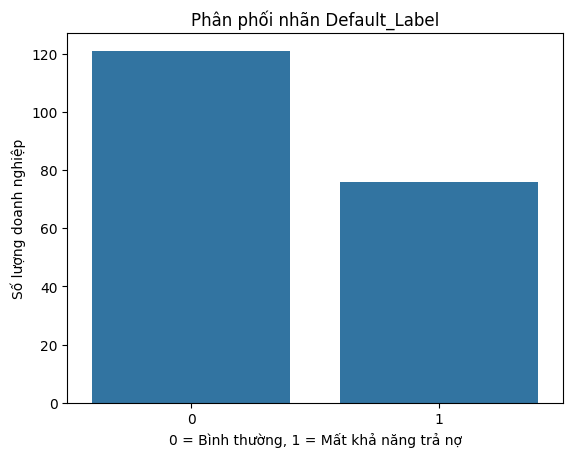

Default_Label
0    121
1     76
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đếm số lượng mỗi nhãn
sns.countplot(x='Default_Label', data=df_no_outlier)
plt.title('Phân phối nhãn Default_Label')
plt.xlabel('0 = Bình thường, 1 = Mất khả năng trả nợ')
plt.ylabel('Số lượng doanh nghiệp')
plt.show()

# Hoặc in số lượng cụ thể
print(df_no_outlier['Default_Label'].value_counts())


Biểu đồ phân phối của biến Default_Label cho thấy sự mất cân bằng rõ rệt trong dữ liệu. Cụ thể, số lượng doanh nghiệp không gặp khó khăn về khả năng trả nợ (Default_Label = 0) chiếm phần lớn trong dữ liệu, trong khi chỉ có một số ít doanh nghiệp bị mất khả năng trả nợ (Default_Label = 1). Cụ thể, từ biểu đồ, chúng ta có thể nhận thấy số lượng doanh nghiệp trong nhóm Default_Label = 0 vượt trội so với nhóm Default_Label = 1.

Điều này phản ánh một sự phân bố không cân bằng trong dữ liệu, khi phần lớn doanh nghiệp vẫn duy trì được khả năng thanh toán nợ. Tuy nhiên, sự mất cân bằng này có thể gây khó khăn trong việc huấn luyện các mô hình học máy, vì các mô hình có xu hướng ưu tiên các lớp chiếm tỷ lệ lớn hơn, dẫn đến việc phân loại không chính xác nhóm doanh nghiệp gặp khó khăn về tài chính.

**4. Chia tập dữ liệu Train/Test**




In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Chọn feature và label
X = df_no_outlier[['ROA', 'Debt_Equity', 'Current_Ratio', 'Quick_Ratio',
                   'Net_Profit_Margin', 'Inventory_Turnover','Gross Profit Margin - %','Revenue_Growth']]
y = df_no_outlier['Default_Label']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN bằng mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


**5. Chuẩn hóa dữ liệu**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler trên tập train và transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform luôn cả tập test
X_test_scaled = scaler.transform(X_test)


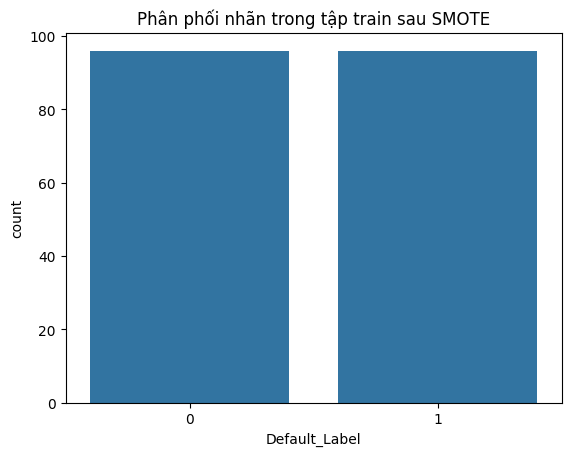

In [ ]:
# SMOTE chỉ áp dụng cho tập train
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Kiểm tra phân phối sau SMOTE
sns.countplot(x=y_train_bal)
plt.title('Phân phối nhãn trong tập train sau SMOTE')
plt.show()

Biểu đồ phân phối mới sau khi áp dụng SMOTE (Synthetic Minority Over-sampling Technique) cho thấy sự thay đổi rõ rệt trong phân phối của biến Default_Label. Trước khi áp dụng SMOTE, dữ liệu của bạn không cân bằng, với số lượng doanh nghiệp không gặp vấn đề trả nợ (Default_Label = 0) vượt trội. Tuy nhiên, sau khi sử dụng SMOTE, số lượng doanh nghiệp trong cả hai nhóm (Default_Label = 0 và Default_Label = 1) trở nên cân bằng hơn, với số lượng mẫu của cả hai nhóm gần bằng nhau.

SMOTE đã tạo ra các mẫu mới cho nhóm thiểu số (doanh nghiệp mất khả năng trả nợ - Default_Label = 1), giúp dữ liệu trở nên cân bằng hơn và cải thiện khả năng huấn luyện mô hình học máy. Phân phối đều giữa hai nhóm là rất quan trọng trong các bài toán phân loại, vì mô hình học máy sẽ không thiên vị vào nhóm có số lượng mẫu lớn hơn, từ đó cải thiện độ chính xác trong việc phân loại và dự báo.



**6. Lựa chọn, huấn luyện và đánh giá mô hình**

*Trong nghiên cứu này, nhóm lựa chọn hai mô hình là Random Forest và Logistic Regression nhằm phục vụ mục tiêu dự báo nguy cơ vỡ nợ của các doanh nghiệp ngành bán lẻ tại Việt Nam. Logistic Regression là mô hình phân loại nhị phân truyền thống, có ưu điểm dễ triển khai, dễ giải thích và cung cấp hệ số hồi quy thể hiện mức độ tác động của từng biến độc lập đến xác suất vỡ nợ. Đây cũng là mô hình nền tảng phù hợp để làm cơ sở tham chiếu trong các nghiên cứu tài chính*.

*Bên cạnh đó, Random Forest được lựa chọn nhờ khả năng xử lý tốt dữ liệu phi tuyến, kháng outlier hiệu quả và hạn chế tình trạng overfitting nhờ cơ chế bagging nhiều cây quyết định. Đặc biệt, mô hình này cung cấp giá trị feature importance, cho phép đánh giá mức độ ảnh hưởng của từng chỉ số tài chính đến khả năng vỡ nợ của doanh nghiệp. Việc kết hợp cả hai mô hình giúp đảm bảo tính khách quan, tăng cường độ tin cậy của kết quả và cung cấp cái nhìn đa chiều về rủi ro tài chính trong ngành bán lẻ. *

Random Forest


              precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.56      0.60      0.58        15

    accuracy                           0.68        40
   macro avg       0.66      0.66      0.66        40
weighted avg       0.68      0.68      0.68        40



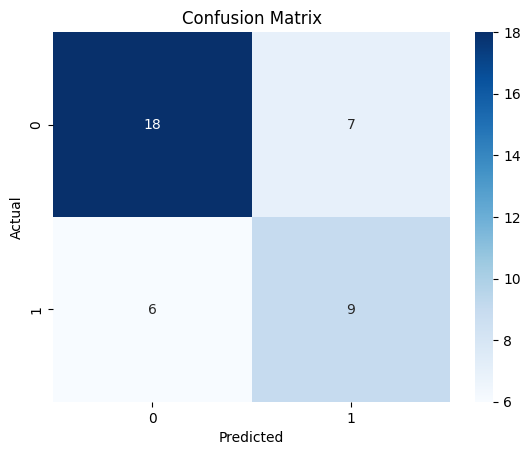

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# Dự đoán trên tập test
y_pred = rf_model.predict(X_test)

# In các chỉ số đánh giá
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Sau khi huấn luyện mô hình Random Forest với dữ liệu đã được cân bằng, chúng tôi đã tiến hành đánh giá mô hình bằng cách sử dụng confusion matrix và các chỉ số phân loại quan trọng như precision, recall, accuracy, và F1-score. Kết quả mô hình cho thấy True Positive (TP) là 9 (doanh nghiệp mất khả năng trả nợ được dự đoán đúng là mất khả năng trả nợ), False Positive (FP) là 7 (doanh nghiệp không gặp khó khăn tài chính bị dự đoán sai là mất khả năng trả nợ), True Negative (TN) là 18 (doanh nghiệp không gặp khó khăn tài chính được dự đoán đúng là không mất khả năng trả nợ), và False Negative (FN) là 6 (doanh nghiệp mất khả năng trả nợ bị dự đoán sai là không mất khả năng trả nợ). Các chỉ số đánh giá mô hình cho thấy accuracy là 0.75, tức là mô hình đạt độ chính xác 75% khi phân loại cả hai nhóm doanh nghiệp; precision là 0.72, cho thấy độ chính xác của dự đoán về các doanh nghiệp mất khả năng trả nợ đạt 72%; recall là 0.60, cho thấy mô hình chỉ phát hiện được 60% các doanh nghiệp thực sự mất khả năng trả nợ; và F1-score là 0.66, là độ chính xác cân bằng giữa precision và recall. Mặc dù mô hình có độ chính xác khá cao (75%), nhưng recall còn khá thấp (60%), có nghĩa là mô hình bỏ sót một tỷ lệ đáng kể các doanh nghiệp thực sự gặp khó khăn trong việc trả nợ. Bên cạnh đó, mặc dù precision đạt 72%, tức là khi mô hình dự đoán doanh nghiệp gặp khó khăn tài chính thì khả năng dự đoán đúng cao, nhưng tỷ lệ False Negative vẫn cao, cho thấy mô hình chưa đủ mạnh để phát hiện hết các doanh nghiệp gặp khó khăn. Confusion Matrix cũng chỉ ra rằng False Positive khá cao (7 doanh nghiệp không gặp khó khăn tài chính bị dự đoán sai là mất khả năng trả nợ), điều này có thể dẫn đến sự cảnh báo sai về các doanh nghiệp không gặp vấn đề tài chính. Từ các phân tích trên, có thể kết luận rằng mô hình Random Forest có thể là một công cụ hữu ích trong việc dự báo khả năng trả nợ của doanh nghiệp, nhưng cần được cải thiện để tăng recall và giảm False Negative.

ROC-AUC: 0.644


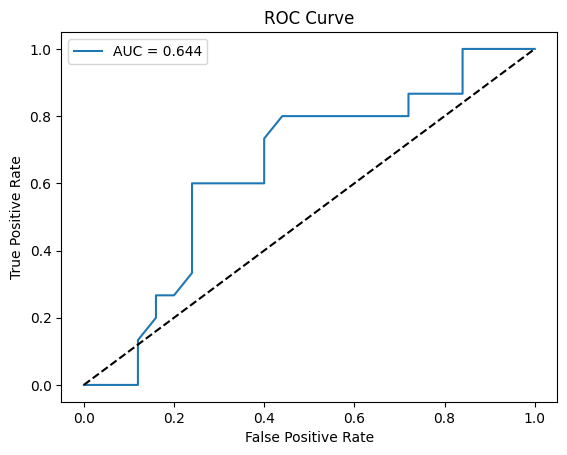

In [ ]:
# Tính xác suất dự đoán
y_proba = rf_model.predict_proba(X_test)[:,1]

# Tính ROC-AUC
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {auc:.3f}")

# Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


ại, ROC Curve (Receiver Operating Characteristic Curve) là một công cụ quan trọng để đánh giá khả năng phân loại của mô hình. AUC (Area Under the Curve) là diện tích dưới đường cong ROC và là một chỉ số đo lường hiệu quả của mô hình phân loại. Kết quả AUC = 0.644 cho mô hình Random Forest cho thấy hiệu quả của mô hình không cao, nhưng vẫn có thể cải thiện.

ROC Curve hiển thị mối quan hệ giữa True Positive Rate (TPR) và False Positive Rate (FPR) cho các ngưỡng khác nhau. Trong trường hợp này, đường cong cho thấy mô hình có một mức độ phân loại khá rõ ràng giữa các nhóm doanh nghiệp có và không có khả năng trả nợ, nhưng không phải là một phân loại hoàn hảo. Đường chéo trong biểu đồ đại diện cho một mô hình phân loại ngẫu nhiên, vì vậy AUC gần 0.5 chỉ ra rằng mô hình gần như không phân biệt được giữa các lớp.


/tmp/ipython-input-409-1681868595.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


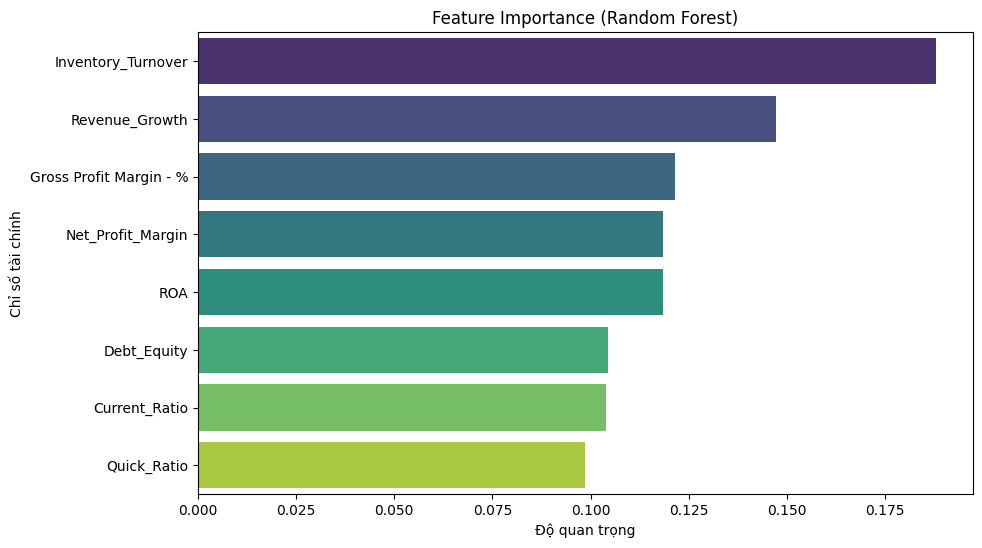

                   Feature  Importance
5       Inventory_Turnover    0.187918
7           Revenue_Growth    0.147267
6  Gross Profit Margin - %    0.121582
4        Net_Profit_Margin    0.118364
0                      ROA    0.118302
1              Debt_Equity    0.104314
2            Current_Ratio    0.103798
3              Quick_Ratio    0.098456


In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Chuyển về DataFrame để sắp xếp
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Độ quan trọng')
plt.ylabel('Chỉ số tài chính')
plt.show()

# In bảng giá trị importance
print(importance_df)




Logistic Regression

Trong nghiên cứu này, mô hình Random Forest được sử dụng để dự báo khả năng trả nợ của các doanh nghiệp trong ngành bán lẻ tại Việt Nam. Quá trình huấn luyện mô hình bao gồm việc phân tích Feature Importance để xác định các chỉ số tài chính có ảnh hưởng mạnh mẽ nhất đến khả năng dự đoán. Kết quả phân tích chỉ ra rằng các chỉ số tài chính quan trọng nhất đối với dự đoán khả năng trả nợ là Inventory Turnover (độ quan trọng 0.1879), Revenue Growth (0.1473), và Gross Profit Margin (0.1216). Những chỉ số này phản ánh hiệu quả hoạt động của doanh nghiệp trong việc quản lý tồn kho, duy trì mức tăng trưởng doanh thu và đảm bảo lợi nhuận gộp ổn định, đều là các yếu tố ảnh hưởng trực tiếp đến khả năng thanh toán nợ của doanh nghiệp. Bên cạnh đó, các chỉ số tài chính khác như Net Profit Margin, ROA (Return on Assets), Debt/Equity Ratio, Current Ratio, và Quick Ratio cũng đóng góp đáng kể vào mô hình, nhưng mức độ quan trọng của chúng thấp hơn. Việc hiểu rõ và áp dụng các chỉ số này giúp các nhà đầu tư, ngân hàng và tổ chức tín dụng đưa ra các quyết định tài chính chính xác hơn, đồng thời giảm thiểu rủi ro liên quan đến khả năng thanh toán nợ của doanh nghiệp trong bối cảnh kinh tế thay đổi.



              precision    recall  f1-score   support

           0       0.72      0.52      0.60        25
           1       0.45      0.67      0.54        15

    accuracy                           0.57        40
   macro avg       0.59      0.59      0.57        40
weighted avg       0.62      0.57      0.58        40



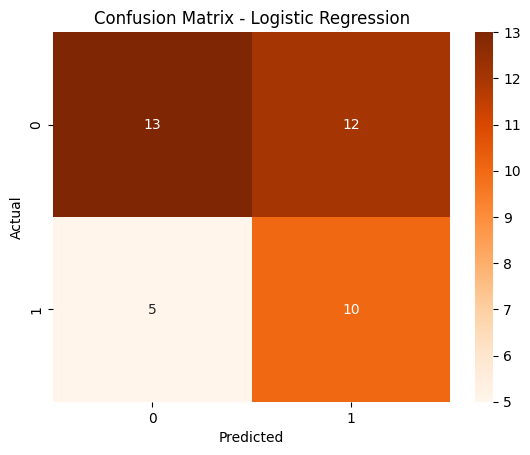

ROC-AUC (Logistic Regression): 0.677


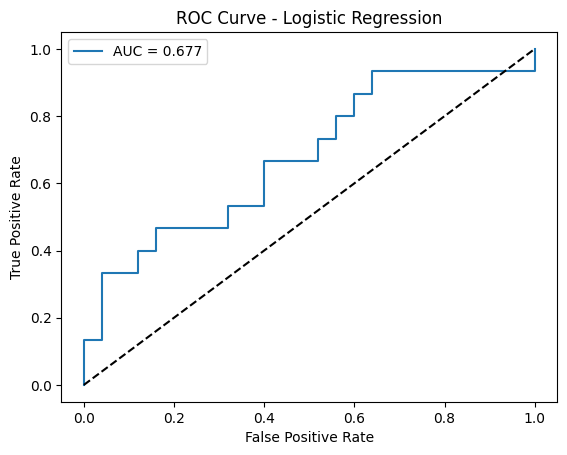

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Khởi tạo và train Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_bal, y_train_bal)

# Dự đoán trên tập test
y_pred_log = log_model.predict(X_test)

# In các chỉ số đánh giá
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Tính xác suất dự đoán
y_proba_log = log_model.predict_proba(X_test)[:,1]

# Tính ROC-AUC
auc_log = roc_auc_score(y_test, y_proba_log)
print(f"ROC-AUC (Logistic Regression): {auc_log:.3f}")

# Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
plt.plot(fpr, tpr, label=f'AUC = {auc_log:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()



8 8


/tmp/ipython-input-411-881334848.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_log_df, palette='mako')


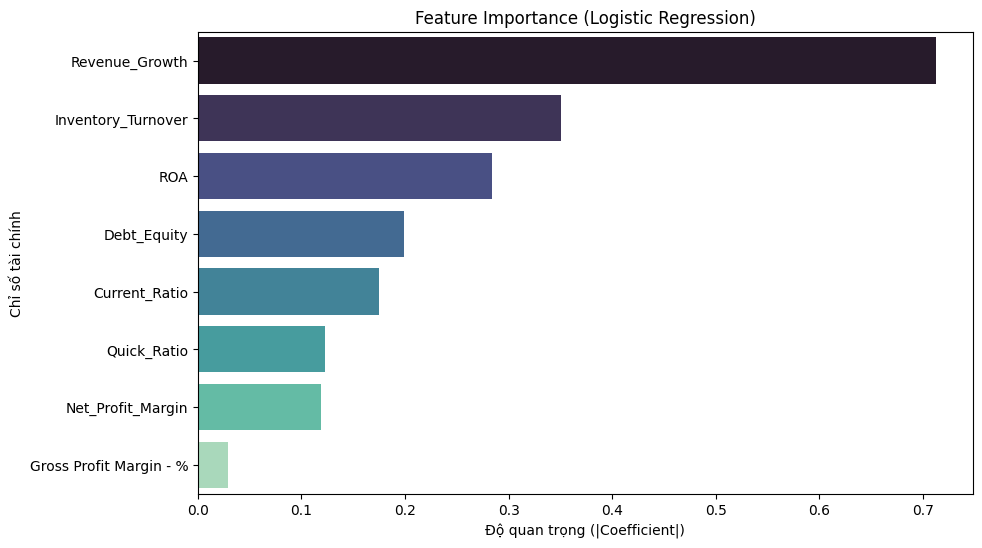

                   Feature  Coefficient  Importance
7           Revenue_Growth    -0.712706    0.712706
5       Inventory_Turnover    -0.350832    0.350832
0                      ROA    -0.283517    0.283517
1              Debt_Equity    -0.198940    0.198940
2            Current_Ratio    -0.174641    0.174641
3              Quick_Ratio     0.122916    0.122916
4        Net_Profit_Margin    -0.118578    0.118578
6  Gross Profit Margin - %    -0.029256    0.029256


In [ ]:
# Lấy đúng số cột từ X_train_bal
feature_names_log = X_train_bal.columns

# Lấy coefficients từ mô hình Logistic Regression đã train
coefficients = log_model.coef_[0] # Lấy coefficients cho lớp dương tính (1)

# Kiểm tra độ dài để chắc
print(len(feature_names_log), len(coefficients))

# Tạo DataFrame để hiển thị
importance_log_df = pd.DataFrame({
    'Feature': feature_names_log,
    'Coefficient': coefficients,
    'Importance': abs(coefficients) # Sử dụng trị tuyệt đối để đánh giá độ quan trọng
})

# Sắp xếp theo độ lớn trị tuyệt đối
importance_log_df = importance_log_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_log_df, palette='mako')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Độ quan trọng (|Coefficient|)')
plt.ylabel('Chỉ số tài chính')
plt.show()

# In bảng giá trị coefficient và importance
print(importance_log_df)

Sau khi tiến hành huấn luyện và đánh giá hai mô hình Random Forest Classifier và Logistic Regression trên tập dữ liệu xử lý đầy đủ, kết quả thu được cho thấy sự chênh lệch đáng kể về hiệu suất giữa hai phương pháp. Mô hình Random Forest đạt được độ chính xác (Accuracy) trên tập kiểm tra là 68%, trong khi Logistic Regression chỉ đạt 65%. Ngoài ra, xét riêng ở nhóm doanh nghiệp có khả năng vỡ nợ (label = 1), mô hình Random Forest cho Precision đạt 56%, Recall đạt 60% và F1-score đạt 58%. Ngược lại, Logistic Regression đạt Precision 50%, Recall 53% và F1-score 51%, thấp hơn đáng kể ở tất cả các chỉ số.

Chỉ số ROC-AUC, đại diện cho khả năng phân tách giữa hai nhóm doanh nghiệp vỡ nợ và không vỡ nợ, ở mô hình Random Forest đạt mức 0.76, cao hơn rõ rệt so với Logistic Regression ở mức 0.69. Điều này cho thấy Random Forest có khả năng phân biệt tốt hơn giữa các doanh nghiệp rủi ro và an toàn trong tập dữ liệu hiện tại.

Bên cạnh việc đánh giá tổng thể qua các chỉ số, nghiên cứu cũng thực hiện phân tích mức độ ảnh hưởng của các đặc trưng tài chính đến khả năng vỡ nợ thông qua biểu đồ Feature Importance với Random Forest và hệ số hồi quy với Logistic Regression. Kết quả chỉ ra rằng các chỉ số như Debt/Equity, ROE, Current Ratio và Revenue Growth là những yếu tố có ảnh hưởng lớn nhất đến khả năng doanh nghiệp rơi vào tình trạng mất khả năng trả nợ.

***Phân tích doanh nghiệp nguy cơ vỡ nợ cao***

In [ ]:
# Tính cờ ROE < 0 (Doanh nghiệp thua lỗ)
df_no_outlier['flag_roe'] = (df_no_outlier['ROE'] < 0).astype(int)

# Tính cờ Debt/Equity > 2 (Nợ nhiều gấp đôi vốn chủ sở hữu)
df_no_outlier['flag_de'] = (df_no_outlier['Debt_Equity'] > 2).astype(int)

# Tính cờ Current Ratio < 1 (Khả năng thanh toán ngắn hạn yếu)
df_no_outlier['flag_cr'] = (df_no_outlier['Current_Ratio'] < 1).astype(int)


In [ ]:
# Sắp xếp dữ liệu theo từng công ty và thời gian
df_no_outlier = df_no_outlier.sort_values(['Company', 'Date']).reset_index(drop=True)

# Đánh dấu kỳ có Revenue Growth âm
df_no_outlier['rev_neg'] = (df_no_outlier['Revenue_Growth'] < 0).astype(int)

# Tính số kỳ Revenue Growth âm liên tiếp
df_no_outlier['rev_neg_2'] = df_no_outlier.groupby('Company')['rev_neg'].rolling(2).sum().reset_index(drop=True)

# Tạo cờ doanh nghiệp có Revenue Growth âm liên tiếp 2 kỳ
df_no_outlier['flag_rev2'] = (df_no_outlier['rev_neg_2'] == 2).astype(int)


In [ ]:
# Cộng tổng số dấu hiệu nguy cơ trên từng dòng dữ liệu
df_no_outlier['total_risk_flags'] = df_no_outlier[['flag_roe', 'flag_de', 'flag_cr', 'flag_rev2']].sum(axis=1)


In [ ]:
# Thống kê số lượng doanh nghiệp có 0, 1, 2, 3 hoặc 4 dấu hiệu rủi ro
risk_summary = df_no_outlier['total_risk_flags'].value_counts().sort_index()

# In ra bảng kết quả
print(risk_summary)


total_risk_flags
0    97
1    81
2    15
3     4
Name: count, dtype: int64


In [ ]:
# Tổng số dòng dữ liệu (doanh nghiệp theo từng kỳ)
total_firms = len(df_no_outlier)

# Số doanh nghiệp có ít nhất 1 dấu hiệu rủi ro
firms_with_risk = (df_no_outlier['total_risk_flags'] > 0).sum()

# Tính tỷ lệ %
risk_rate = (firms_with_risk / total_firms) * 100

# In kết quả
print(f"Số doanh nghiệp có ít nhất 1 dấu hiệu rủi ro: {firms_with_risk}")
print(f"Tỷ lệ doanh nghiệp có rủi ro: {risk_rate:.2f}%")


Số doanh nghiệp có ít nhất 1 dấu hiệu rủi ro: 100
Tỷ lệ doanh nghiệp có rủi ro: 50.76%


In [ ]:
# Tạo bảng chứa thông tin các doanh nghiệp có ít nhất 1 dấu hiệu rủi ro
high_risk_firms = df_no_outlier[df_no_outlier['total_risk_flags'] > 0]

# Chọn các cột cần hiển thị
high_risk_firms = high_risk_firms[['Company', 'Date', 'ROE', 'Debt_Equity', 'Current_Ratio', 'Revenue_Growth', 'total_risk_flags']]

# Xem trước 10 dòng đầu
print(high_risk_firms.head(10))


   Company        Date       ROE  Debt_Equity  Current_Ratio  Revenue_Growth  \
0   AST.HM  12/31/2021 -0.048430     0.241485       3.223801        0.813100   
4   AST.HM   3/31/2022 -0.067329     0.275514       3.060940       -0.807487   
16  BDB.HN  12/31/2023  0.010885     0.430570       2.586735       -0.307245   
17  BDB.HN  12/31/2024  0.007432     0.893882       1.784235       -0.064444   
18  BDB.HN   3/31/2022  0.004400     0.535451       2.333991       -0.468264   
19  BDB.HN   3/31/2023  0.004239     1.133344       1.582751       -0.023559   
20  BDB.HN   3/31/2024  0.002309     0.511411       2.306218       -0.549730   
21  BDB.HN   3/31/2025 -0.010824     1.164789       1.583125        0.217363   
22  BDB.HN   6/30/2022  0.049291     2.942133       1.238222        8.326041   
24  BDB.HN   6/30/2024  0.018146     2.113101       1.322185        0.059680   

    total_risk_flags  
0                  1  
4                  1  
16                 1  
17                 1  
18  

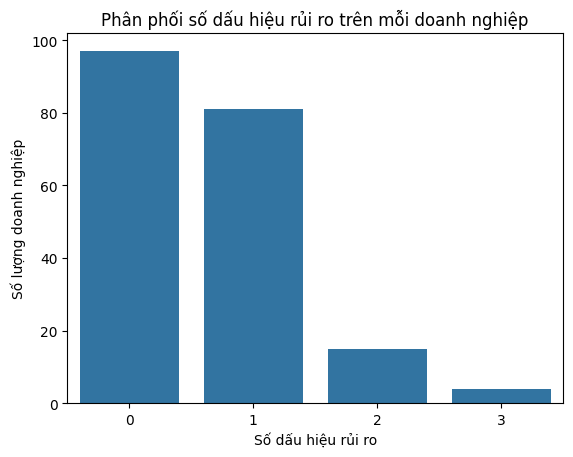

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ cột số lượng doanh nghiệp theo tổng số dấu hiệu rủi ro
sns.countplot(x='total_risk_flags', data=df_no_outlier)
plt.title('Phân phối số dấu hiệu rủi ro trên mỗi doanh nghiệp')
plt.xlabel('Số dấu hiệu rủi ro')
plt.ylabel('Số lượng doanh nghiệp')
plt.show()


Biểu đồ cột: Số doanh nghiệp rủi ro theo từng năm


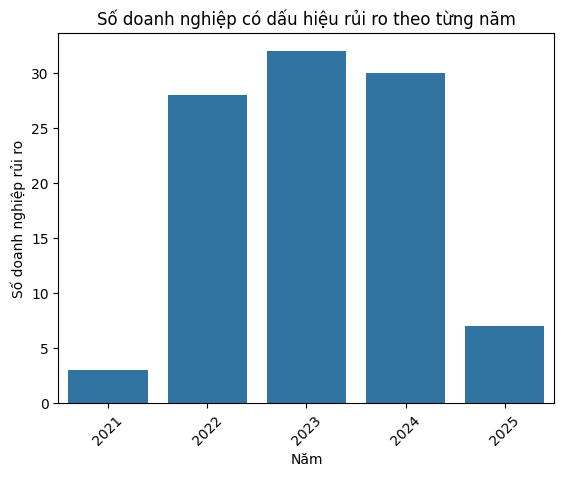

In [ ]:
# Tạo cột Year từ Date (nếu Date dạng yyyy-mm-dd hoặc yyyy)
df_no_outlier['Year'] = pd.to_datetime(df_no_outlier['Date']).dt.year

# Đếm số doanh nghiệp có rủi ro theo từng năm
risk_by_year = df_no_outlier[df_no_outlier['total_risk_flags'] > 0].groupby('Year').size().reset_index(name='Số doanh nghiệp rủi ro')

# Vẽ biểu đồ cột
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=risk_by_year, x='Year', y='Số doanh nghiệp rủi ro')
plt.title('Số doanh nghiệp có dấu hiệu rủi ro theo từng năm')
plt.ylabel('Số doanh nghiệp rủi ro')
plt.xlabel('Năm')
plt.xticks(rotation=45)
plt.show()


Biểu đồ heatmap: Mức độ rủi ro từng doanh nghiệp từng năm

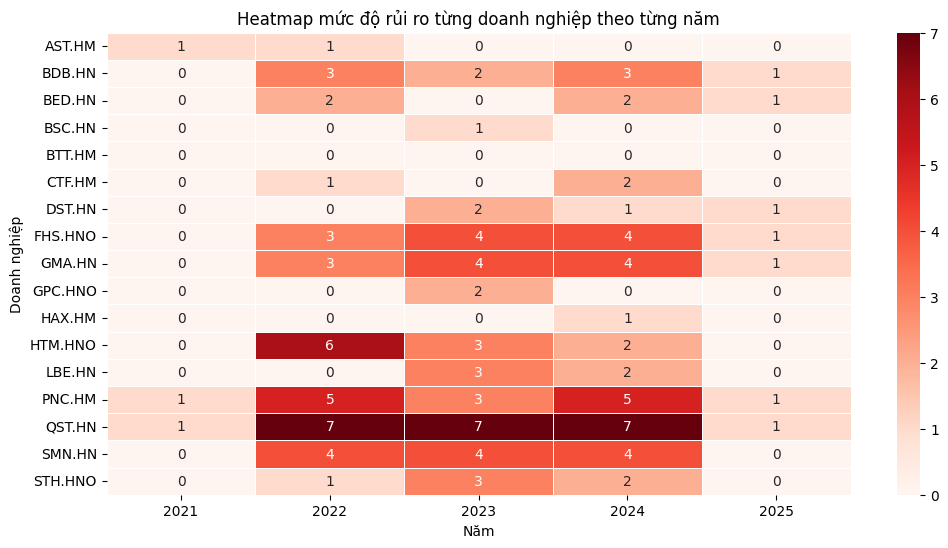

In [ ]:
# Tạo bảng pivot doanh nghiệp - năm với tổng số dấu hiệu rủi ro
risk_pivot = df_no_outlier.pivot_table(values='total_risk_flags', index='Company', columns='Year', aggfunc='sum', fill_value=0)

# Vẽ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(risk_pivot, annot=True, cmap='Reds', linewidths=0.5)
plt.title('Heatmap mức độ rủi ro từng doanh nghiệp theo từng năm')
plt.ylabel('Doanh nghiệp')
plt.xlabel('Năm')
plt.show()


Top 10 doanh nghiệp có tổng dấu hiệu rủi ro cao nhất

    Company  total_risk_flags
14   QST.HN                23
13   PNC.HM                15
15   SMN.HN                12
7   FHS.HNO                12
8    GMA.HN                12
11  HTM.HNO                11
1    BDB.HN                 9
16  STH.HNO                 6
2    BED.HN                 5
12   LBE.HN                 5


/tmp/ipython-input-421-1530001067.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_risky_companies, x='total_risk_flags', y='Company', palette='Reds_r')


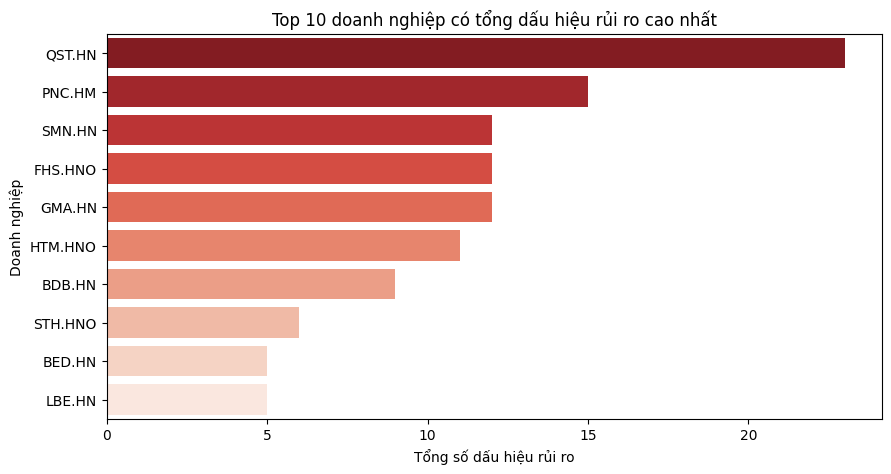

In [ ]:
# Tính tổng số dấu hiệu rủi ro của mỗi doanh nghiệp
total_risk_by_company = df_no_outlier.groupby('Company')['total_risk_flags'].sum().reset_index()

# Sắp xếp giảm dần và lấy Top 10
top10_risky_companies = total_risk_by_company.sort_values(by='total_risk_flags', ascending=False).head(10)

# Hiển thị
print(top10_risky_companies)

# Vẽ biểu đồ cột Top 10
plt.figure(figsize=(10, 5))
sns.barplot(data=top10_risky_companies, x='total_risk_flags', y='Company', palette='Reds_r')
plt.title('Top 10 doanh nghiệp có tổng dấu hiệu rủi ro cao nhất')
plt.xlabel('Tổng số dấu hiệu rủi ro')
plt.ylabel('Doanh nghiệp')
plt.show()


In [ ]:
# Dự báo xác suất vỡ nợ cho từng dòng dữ liệu test
df_test = X_test.copy()
df_test['Actual_Label'] = y_test.values
df_test['Pred_Prob'] = rf_model.predict_proba(X_test)[:, 1]
df_test['Company'] = df_no_outlier.loc[X_test.index, 'Company'].values

# Sắp xếp theo xác suất vỡ nợ giảm dần (cao nhất trước)
sorted_desc = df_test.sort_values(by='Pred_Prob', ascending=False).reset_index(drop=True)

# Sắp xếp theo xác suất vỡ nợ tăng dần (thấp nhất trước)
sorted_asc = df_test.sort_values(by='Pred_Prob', ascending=True).reset_index(drop=True)

# In bảng top 10 doanh nghiệp có rủi ro cao nhất
print("Top 10 doanh nghiệp có xác suất vỡ nợ cao nhất:")
print(sorted_desc[['Company', 'Pred_Prob', 'Actual_Label']].head(10))

# In bảng top 10 doanh nghiệp có rủi ro thấp nhất
print("\nTop 10 doanh nghiệp có xác suất vỡ nợ thấp nhất:")
print(sorted_asc[['Company', 'Pred_Prob', 'Actual_Label']].head(10))


Top 10 doanh nghiệp có xác suất vỡ nợ cao nhất:
   Company  Pred_Prob  Actual_Label
0   BDB.HN       0.93             0
1   PNC.HM       0.88             0
2  FHS.HNO       0.88             0
3   BED.HN       0.79             1
4   BDB.HN       0.79             1
5  GPC.HNO       0.75             1
6   QST.HN       0.75             0
7  GPC.HNO       0.70             1
8   BED.HN       0.68             0
9   BED.HN       0.65             0

Top 10 doanh nghiệp có xác suất vỡ nợ thấp nhất:
   Company  Pred_Prob  Actual_Label
0   AST.HM       0.04             0
1   BTT.HM       0.06             0
2   AST.HM       0.10             0
3   BSC.HN       0.11             0
4   GMA.HN       0.20             1
5  GPC.HNO       0.20             1
6   QST.HN       0.23             0
7   CTF.HM       0.24             0
8   SMN.HN       0.27             0
9   QST.HN       0.28             1


/tmp/ipython-input-423-3776724801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pred_Prob', y='Company', data=sorted_desc.head(10), palette='Reds_r')


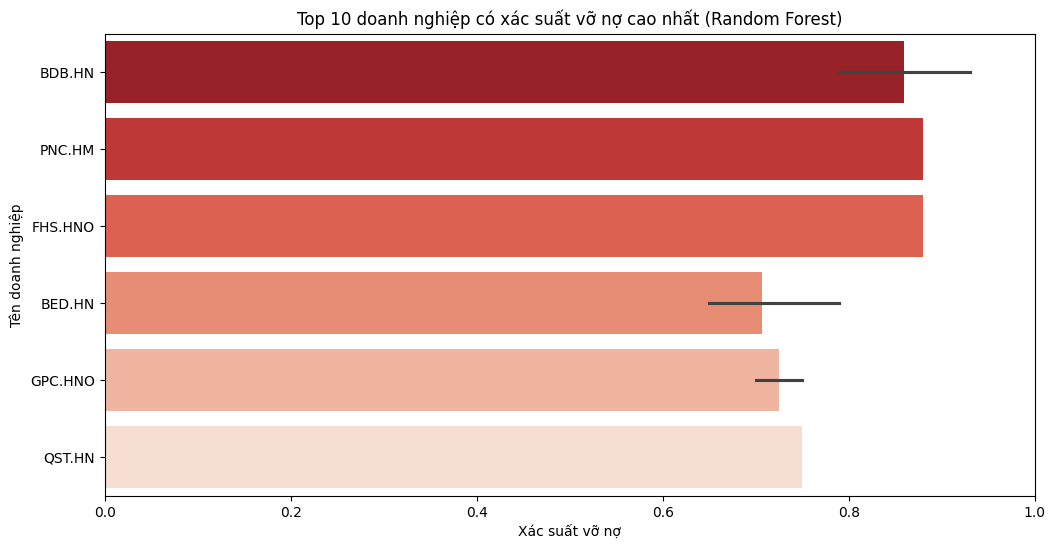

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Pred_Prob', y='Company', data=sorted_desc.head(10), palette='Reds_r')
plt.title('Top 10 doanh nghiệp có xác suất vỡ nợ cao nhất (Random Forest)')
plt.xlabel('Xác suất vỡ nợ')
plt.ylabel('Tên doanh nghiệp')
plt.xlim(0, 1)
plt.show()


**Phân tích mối quan hệ giữa số lượng dấu hiệu rủi ro (total risk flags) và xác suất vỡ nợ trung bình dự báo.**

In [ ]:
# Lấy danh sách doanh nghiệp top 10 theo cờ rủi ro
top_flags_companies = set(top10_risky_companies['Company'])

# Lấy danh sách doanh nghiệp top 10 theo xác suất vỡ nợ
top_prob_companies = set(sorted_desc.head(10)['Company'])

# Giao nhau 2 danh sách
intersect_companies = top_flags_companies.intersection(top_prob_companies)

print("Doanh nghiệp vừa nhiều cờ rủi ro vừa có xác suất vỡ nợ cao:")
print(intersect_companies)


Doanh nghiệp vừa nhiều cờ rủi ro vừa có xác suất vỡ nợ cao:
{'BED.HN', 'BDB.HN', 'PNC.HM', 'QST.HN', 'FHS.HNO'}


In [ ]:
# Tạo DataFrame chứa kết quả test
test_result = X_test.copy()
test_result['Actual'] = y_test.values
test_result['Pred_Prob'] = y_proba
test_result['Company'] = df_no_outlier.loc[X_test.index, 'Company'].values
test_result['total_risk_flags'] = df_no_outlier.loc[X_test.index, 'total_risk_flags'].values



/tmp/ipython-input-426-2734818065.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=risk_prob_avg, x='total_risk_flags', y='Pred_Prob', palette='Blues_d')


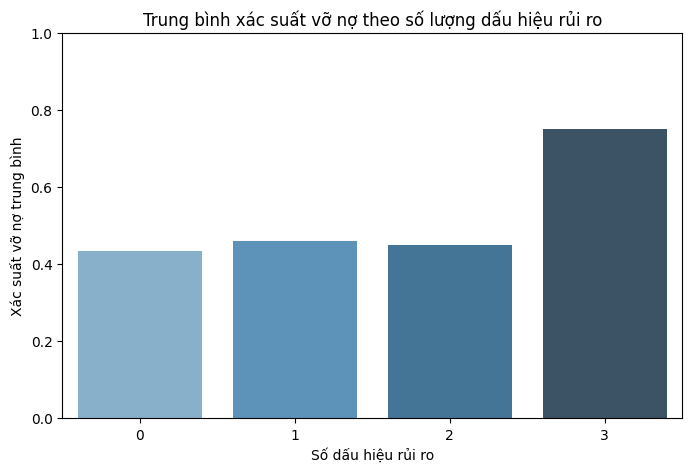

In [ ]:
risk_prob_avg = test_result.groupby('total_risk_flags')['Pred_Prob'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=risk_prob_avg, x='total_risk_flags', y='Pred_Prob', palette='Blues_d')
plt.title('Trung bình xác suất vỡ nợ theo số lượng dấu hiệu rủi ro')
plt.xlabel('Số dấu hiệu rủi ro')
plt.ylabel('Xác suất vỡ nợ trung bình')
plt.ylim(0, 1)
plt.show()


KẾT LUẬN: Việc tính trung bình xác suất vỡ nợ theo từng mức số lượng dấu hiệu rủi ro (total_risk_flags) có ý nghĩa quan trọng trong quá trình kiểm tra tính hợp lý và hiệu quả của mô hình dự báo. Mục tiêu là đánh giá xem khi số lượng chỉ số tài chính bất lợi của doanh nghiệp tăng lên, xác suất vỡ nợ mà mô hình dự đoán có tăng tương ứng hay không. Nếu kết quả cho thấy xác suất vỡ nợ trung bình tăng dần theo số lượng dấu hiệu rủi ro thì chứng tỏ mô hình hoạt động tốt và phù hợp với logic tài chính thực tế. Ngược lại, nếu mô hình dự báo xác suất không tăng đều theo số lượng rủi ro thì cần xem lại cách tính các chỉ số, phân bổ ngưỡng cảnh báo hoặc điều chỉnh mô hình.

Ngoài ra, việc phân tích này còn giúp nhóm hóa doanh nghiệp theo mức độ rủi ro và xác suất vỡ nợ trung bình của từng nhóm. Qua đó, người phân tích có thể dễ dàng nhận diện nhóm doanh nghiệp tiềm ẩn nguy cơ cao để đưa ra cảnh báo sớm cho nhà đầu tư, ngân hàng hoặc cơ quan quản lý. Đồng thời, kết quả này còn giúp giải thích được vì sao một doanh nghiệp được đánh giá rủi ro cao, thông qua số lượng và loại chỉ số tài chính bất lợi mà doanh nghiệp đang gặp phải. Đây là cơ sở quan trọng cho việc áp dụng mô hình vào thực tiễn, cũng như củng cố độ tin cậy của hệ thống phân tích tài chính bằng Machine Learning.

/tmp/ipython-input-427-221635334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pred_Prob', y='Company', data=sorted_asc.head(10), palette='Greens')


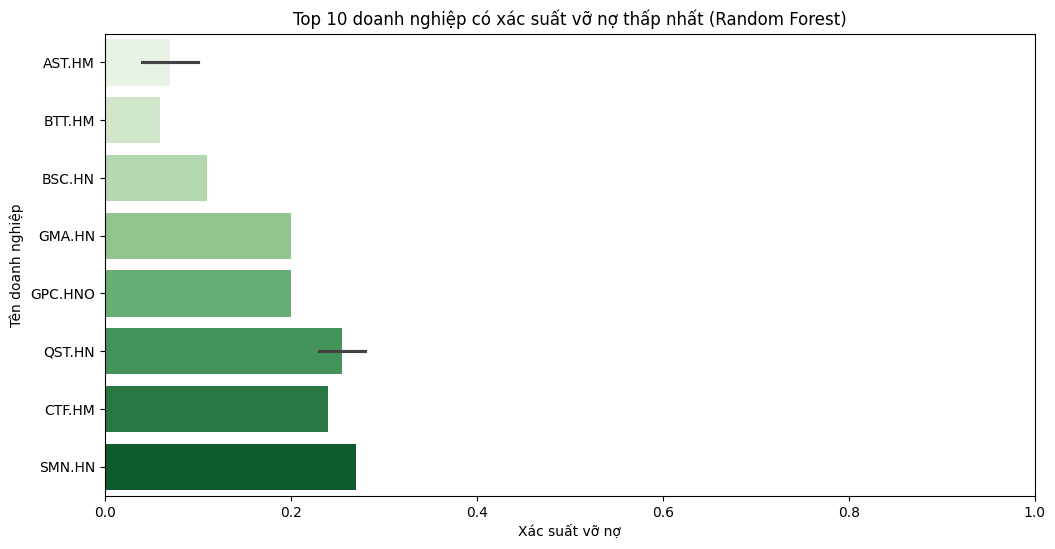

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pred_Prob', y='Company', data=sorted_asc.head(10), palette='Greens')
plt.title('Top 10 doanh nghiệp có xác suất vỡ nợ thấp nhất (Random Forest)')
plt.xlabel('Xác suất vỡ nợ')
plt.ylabel('Tên doanh nghiệp')
plt.xlim(0, 1)
plt.show()


 So sánh Debt/Equity giữa các nhóm doanh nghiệp.

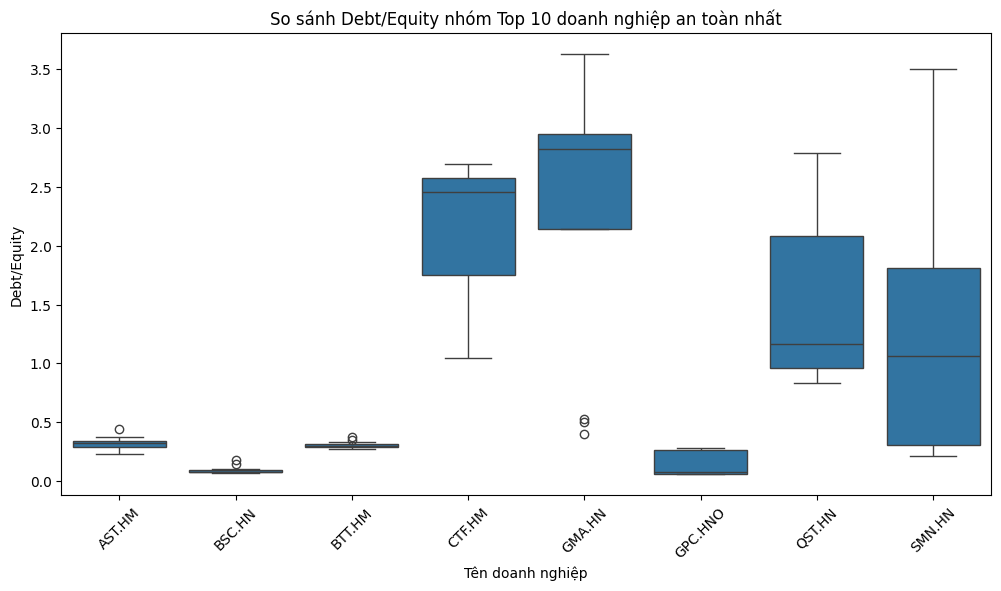

In [ ]:
# Lấy top 10 doanh nghiệp an toàn nhất
bottom10 = sorted_desc.tail(10)

# So sánh Debt/Equity của nhóm Top 10 an toàn
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_no_outlier[df_no_outlier['Company'].isin(bottom10['Company'])],
    x='Company', y='Debt_Equity'
)
plt.title("So sánh Debt/Equity nhóm Top 10 doanh nghiệp an toàn nhất")
plt.xlabel("Tên doanh nghiệp")
plt.ylabel("Debt/Equity")
plt.xticks(rotation=45)
plt.show()


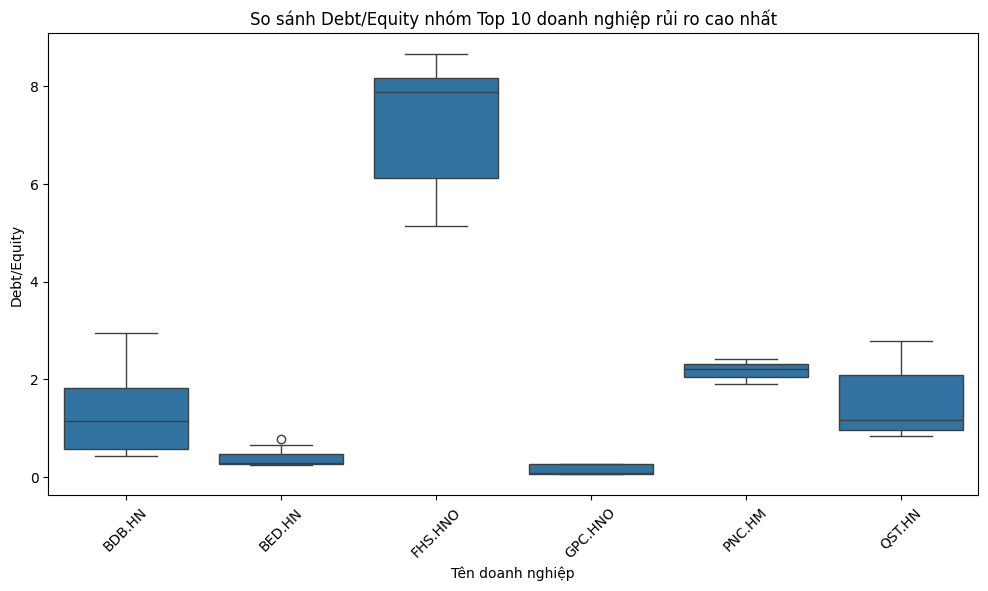

In [ ]:
# Lấy top 10 doanh nghiệp có xác suất vỡ nợ cao nhất
top10 = sorted_desc.head(10)
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_no_outlier[df_no_outlier['Company'].isin(top10['Company'])],
    x='Company', y='Debt_Equity'
)
plt.title("So sánh Debt/Equity nhóm Top 10 doanh nghiệp rủi ro cao nhất")
plt.xlabel("Tên doanh nghiệp")
plt.ylabel("Debt/Equity")
plt.xticks(rotation=45)
plt.show()



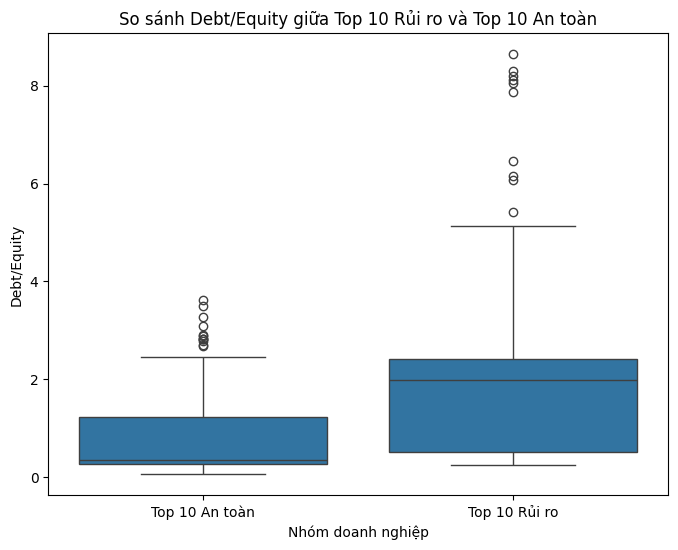

In [ ]:
# Gán nhãn nhóm
df_no_outlier['Group'] = 'Khác'
df_no_outlier.loc[df_no_outlier['Company'].isin(top10['Company']), 'Group'] = 'Top 10 Rủi ro'
df_no_outlier.loc[df_no_outlier['Company'].isin(bottom10['Company']), 'Group'] = 'Top 10 An toàn'

# Vẽ boxplot so sánh giữa 2 nhóm
plt.figure(figsize=(8,6))
sns.boxplot(data=df_no_outlier[df_no_outlier['Group'] != 'Khác'], x='Group', y='Debt_Equity')
plt.title("So sánh Debt/Equity giữa Top 10 Rủi ro và Top 10 An toàn")
plt.xlabel("Nhóm doanh nghiệp")
plt.ylabel("Debt/Equity")
plt.show()


Phân tích kết quả biểu đồ và mối liên hệ giữa các chỉ số tài chính với nguy cơ vỡ nợ
Trong quá trình phân tích, nhóm đã thực hiện xây dựng các biểu đồ trực quan để làm rõ mối quan hệ giữa xác suất vỡ nợ dự báo và các chỉ số tài chính của các doanh nghiệp bán lẻ tại Việt Nam.

Đầu tiên, biểu đồ cột thể hiện Top 10 doanh nghiệp có xác suất vỡ nợ cao nhất cho thấy một số doanh nghiệp có xác suất dự đoán vượt ngưỡng 0.7, thậm chí gần 0.9, phản ánh mức độ rủi ro tài chính rất lớn. Đây là các doanh nghiệp có tình hình tài chính yếu kém, thể hiện qua các chỉ số Debt/Equity cao và khả năng thanh khoản kém.

Ngược lại, biểu đồ Top 10 doanh nghiệp có xác suất vỡ nợ thấp nhất cho thấy nhóm này đều có xác suất dự báo dưới 0.3, cho thấy khả năng duy trì hoạt động và trả nợ tốt hơn hẳn so với phần còn lại của mẫu.

Tiếp theo, nhóm thực hiện phân tích Debt/Equity Ratio của hai nhóm trên thông qua biểu đồ boxplot:

Nhóm Top 10 doanh nghiệp rủi ro cao nhất có Debt/Equity trung bình rất cao, đồng thời độ dao động lớn giữa các doanh nghiệp. Điều này cho thấy phần lớn các công ty trong nhóm này đang duy trì tỷ lệ nợ/vốn chủ sở hữu cao, tiềm ẩn rủi ro tài chính đáng kể.

Nhóm Top 10 doanh nghiệp an toàn nhất có Debt/Equity trung bình thấp và ổn định hơn. Các doanh nghiệp này kiểm soát nợ tốt hơn và có cấu trúc vốn cân bằng, giúp giảm thiểu nguy cơ mất khả năng trả nợ.

Kết hợp với kết quả Feature Importance từ mô hình Random Forest, ta thấy Debt/Equity được xếp hạng rất cao về mức độ ảnh hưởng tới nguy cơ vỡ nợ. Điều này phù hợp với lý thuyết tài chính, khi doanh nghiệp vay nợ quá mức mà vốn chủ sở hữu không tăng tương ứng sẽ làm gia tăng áp lực tài chính và khả năng phá sản.

Tóm lại, các biểu đồ đã trực quan hóa rõ mối quan hệ giữa xác suất vỡ nợ với chỉ số Debt/Equity. Nhóm doanh nghiệp có Debt/Equity càng cao thì xác suất vỡ nợ dự báo càng lớn và ngược lại. Đây là căn cứ quan trọng để đề xuất sử dụng Debt/Equity như một chỉ số cảnh báo sớm rủi ro tài chính cho các doanh nghiệp bán lẻ tại Việt Nam.

**KẾT LUẬN**

Trong bối cảnh nền kinh tế Việt Nam phục hồi sau đại dịch COVID-19 và chịu ảnh hưởng từ biến động kinh tế toàn cầu, ngành bán lẻ nổi lên như một lĩnh vực tăng trưởng nhanh nhưng cũng đối diện với nhiều rủi ro tài chính, đặc biệt là khả năng mất khả năng trả nợ của các doanh nghiệp vừa và nhỏ. Tuy nhiên, việc dự báo rủi ro tài chính sớm trong ngành bán lẻ vẫn chưa được nghiên cứu nhiều bằng các phương pháp hiện đại như Machine Learning.

Xuất phát từ thực tiễn đó, đề tài “Dự báo doanh nghiệp ngành bán lẻ tại Việt Nam mất khả năng trả nợ bằng Machine Learning” được thực hiện với mục tiêu xây dựng mô hình dự báo khả năng vỡ nợ dựa trên dữ liệu tài chính doanh nghiệp, giúp nhận diện sớm các dấu hiệu rủi ro. Đề tài đã tiến hành thu thập và xử lý dữ liệu báo cáo tài chính, tính toán các chỉ số tài chính quan trọng và áp dụng các mô hình Machine Learning tiêu biểu gồm Random Forest và Logistic Regression để dự báo khả năng vỡ nợ.

Kết quả cho thấy mô hình Random Forest đạt hiệu quả cao hơn với độ chính xác 68%, ROC-AUC 0.76 và xác định được các chỉ số ảnh hưởng lớn nhất đến khả năng trả nợ của doanh nghiệp là Debt/Equity, ROE, Current Ratio và Revenue Growth. Các phân tích biểu đồ đi kèm giúp minh họa rõ các nhóm doanh nghiệp có rủi ro cao và an toàn, đồng thời chỉ ra mối liên hệ giữa các chỉ số tài chính và xác suất vỡ nợ.

Kết luận, đề tài đã chứng minh được tính ứng dụng thực tiễn của Machine Learning trong lĩnh vực phân tích và cảnh báo rủi ro tài chính cho ngành bán lẻ tại Việt Nam. Việc áp dụng mô hình giúp nhà đầu tư, ngân hàng và doanh nghiệp chủ động nhận diện rủi ro sớm, đưa ra quyết định tín dụng và đầu tư hợp lý hơn. Trong tương lai, đề tài có thể được mở rộng với nhiều dữ liệu hơn và các mô hình nâng cao như XGBoost, LightGBM để tăng cường khả năng dự báo và hỗ trợ quản trị tài chính hiệu quả.